In [25]:
import os             # 운영 체제와 상호 작용하기 위한 모듈
import matplotlib.pyplot as plt     # 데이터 시각화를 위한 Matplotlib의 pyplot 모듈
import pandas as pd                 # 데이터 조작 및 분석을 위한 Pandas 라이브러리
from matplotlib.ticker import MultipleLocator

import csv
from sklearn.metrics import r2_score

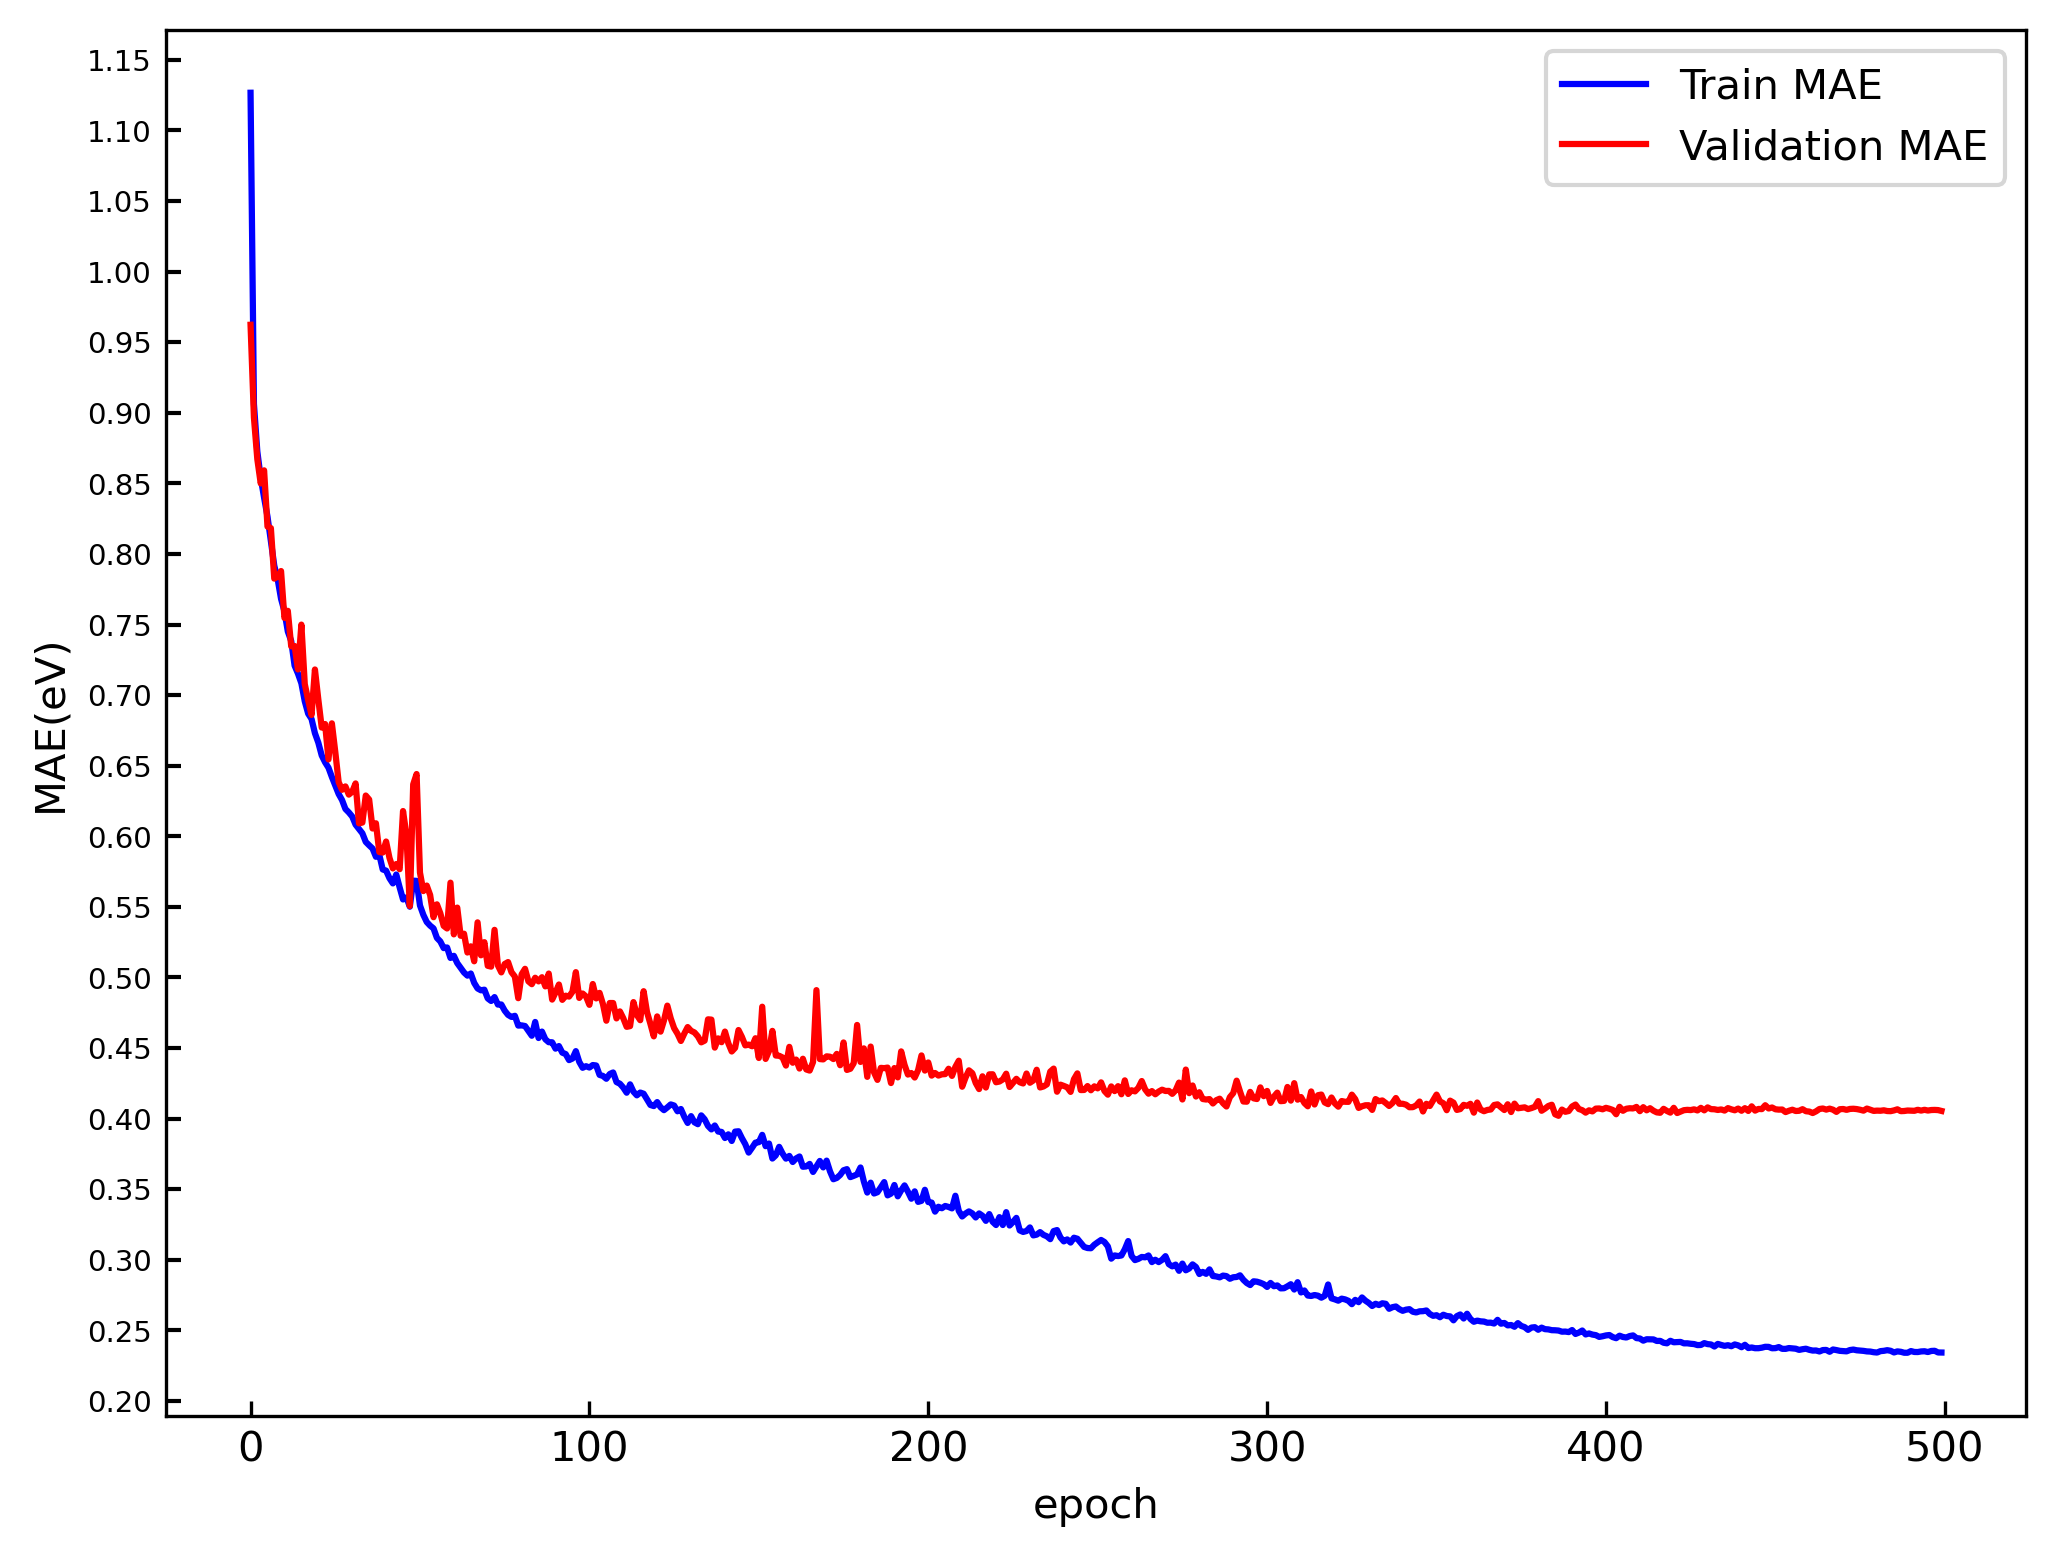

In [3]:


# 그래프 크기와 DPI 설정
plt.figure(figsize=(8, 6), dpi=300)

metrics = pd.read_csv("/home/ljm/matgl_bandgap/Last_version/logs/MEGNet_training/version_0/metrics.csv")
metrics = metrics.set_index(metrics.columns[0])

# 시각화
metrics["train_MAE"].dropna().plot(color='blue', label='Train MAE')
metrics["val_MAE"].dropna().plot(color='red', label='Validation MAE')

plt.yticks(fontsize=7)  # 눈금 폰트 크기 설정
plt.gca().tick_params(axis='y', which='major', width=1)  # 주요 눈금 두께 설정

# 주요 눈금 간격 설정
majorLocator = MultipleLocator(0.05)  # 주요 눈금 간격을 0.05로 설정
plt.gca().yaxis.set_major_locator(majorLocator)

# 주요 눈금을 안쪽으로 추가
plt.gca().tick_params(axis='y', direction='in')
plt.gca().tick_params(axis='x', direction='in')

# 세로축 제목 추가
plt.ylabel("MAE(eV)", fontsize=10)  # "Your Y-axis Label"를 원하는 제목으로 바꿔주세요

_ = plt.legend()

# 그래프 저장
plt.savefig('/home/ljm/matgl_bandgap/Last_version/ouput_1.png', dpi=300, bbox_inches='tight')

plt.show()


### R2 graph


5784
5784
[1.4611, 6.2705, 0.3014, 2.771, 1.2487, 2.5656, 2.6869, 2.8885, 2.0623, 3.3299, 1.3939, 0.1451, 2.8824, 2.0821, 1.7256, 3.5898, 3.7544, 5.2081, 2.6724, 3.996, 2.8487, 1.6843, 1.2053, 1.4501, 0.8651, 4.7346, 3.3986, 0.176, 4.6073, 0.8677, 3.1613, 3.9611, 0.4148, 4.5405, 2.5292, 5.6355, 3.5227, 0.0466, 0.5456, 3.4006, 1.6228, 0.2989, 5.6966, 3.976, 0.0172, 3.6331, 3.5972, 1.9742, 3.2015, 5.495, 2.0078, 1.2351, 0.4277, 3.6796, 4.495, 5.0515, 0.115, 3.7911, 1.7295, 0.7962, 1.3888, 0.4808, 1.0457, 3.4263, 2.1319, 1.2807, 1.9513, 3.2395, 5.8933, 3.9494, 0.6328, 0.963, 2.8337, 5.2325, 3.5747, 0.4053, 2.0942, 3.2254, 0.7742, 0.9057, 2.7881, 1.6344, 2.2079, 5.4237, 5.5451, 0.5544, 1.9776, 3.7355, 5.5299, 0.4898, 1.6433, 3.4278, 0.6286, 2.4972, 0.0015, 1.8698, 3.3687, 4.1512, 2.3999, 0.2319, 0.3492, 0.3996, 5.7435, 1.5734, 1.2289, 3.5373, 1.45, 5.6317, 2.4934, 3.9512, 1.0232, 0.9866, 3.2716, 0.9487, 2.7561, 5.1696, 5.0482, 1.1417, 1.2189, 3.2106, 0.8992, 3.9285, 3.2353, 3.9738, 4.165, 

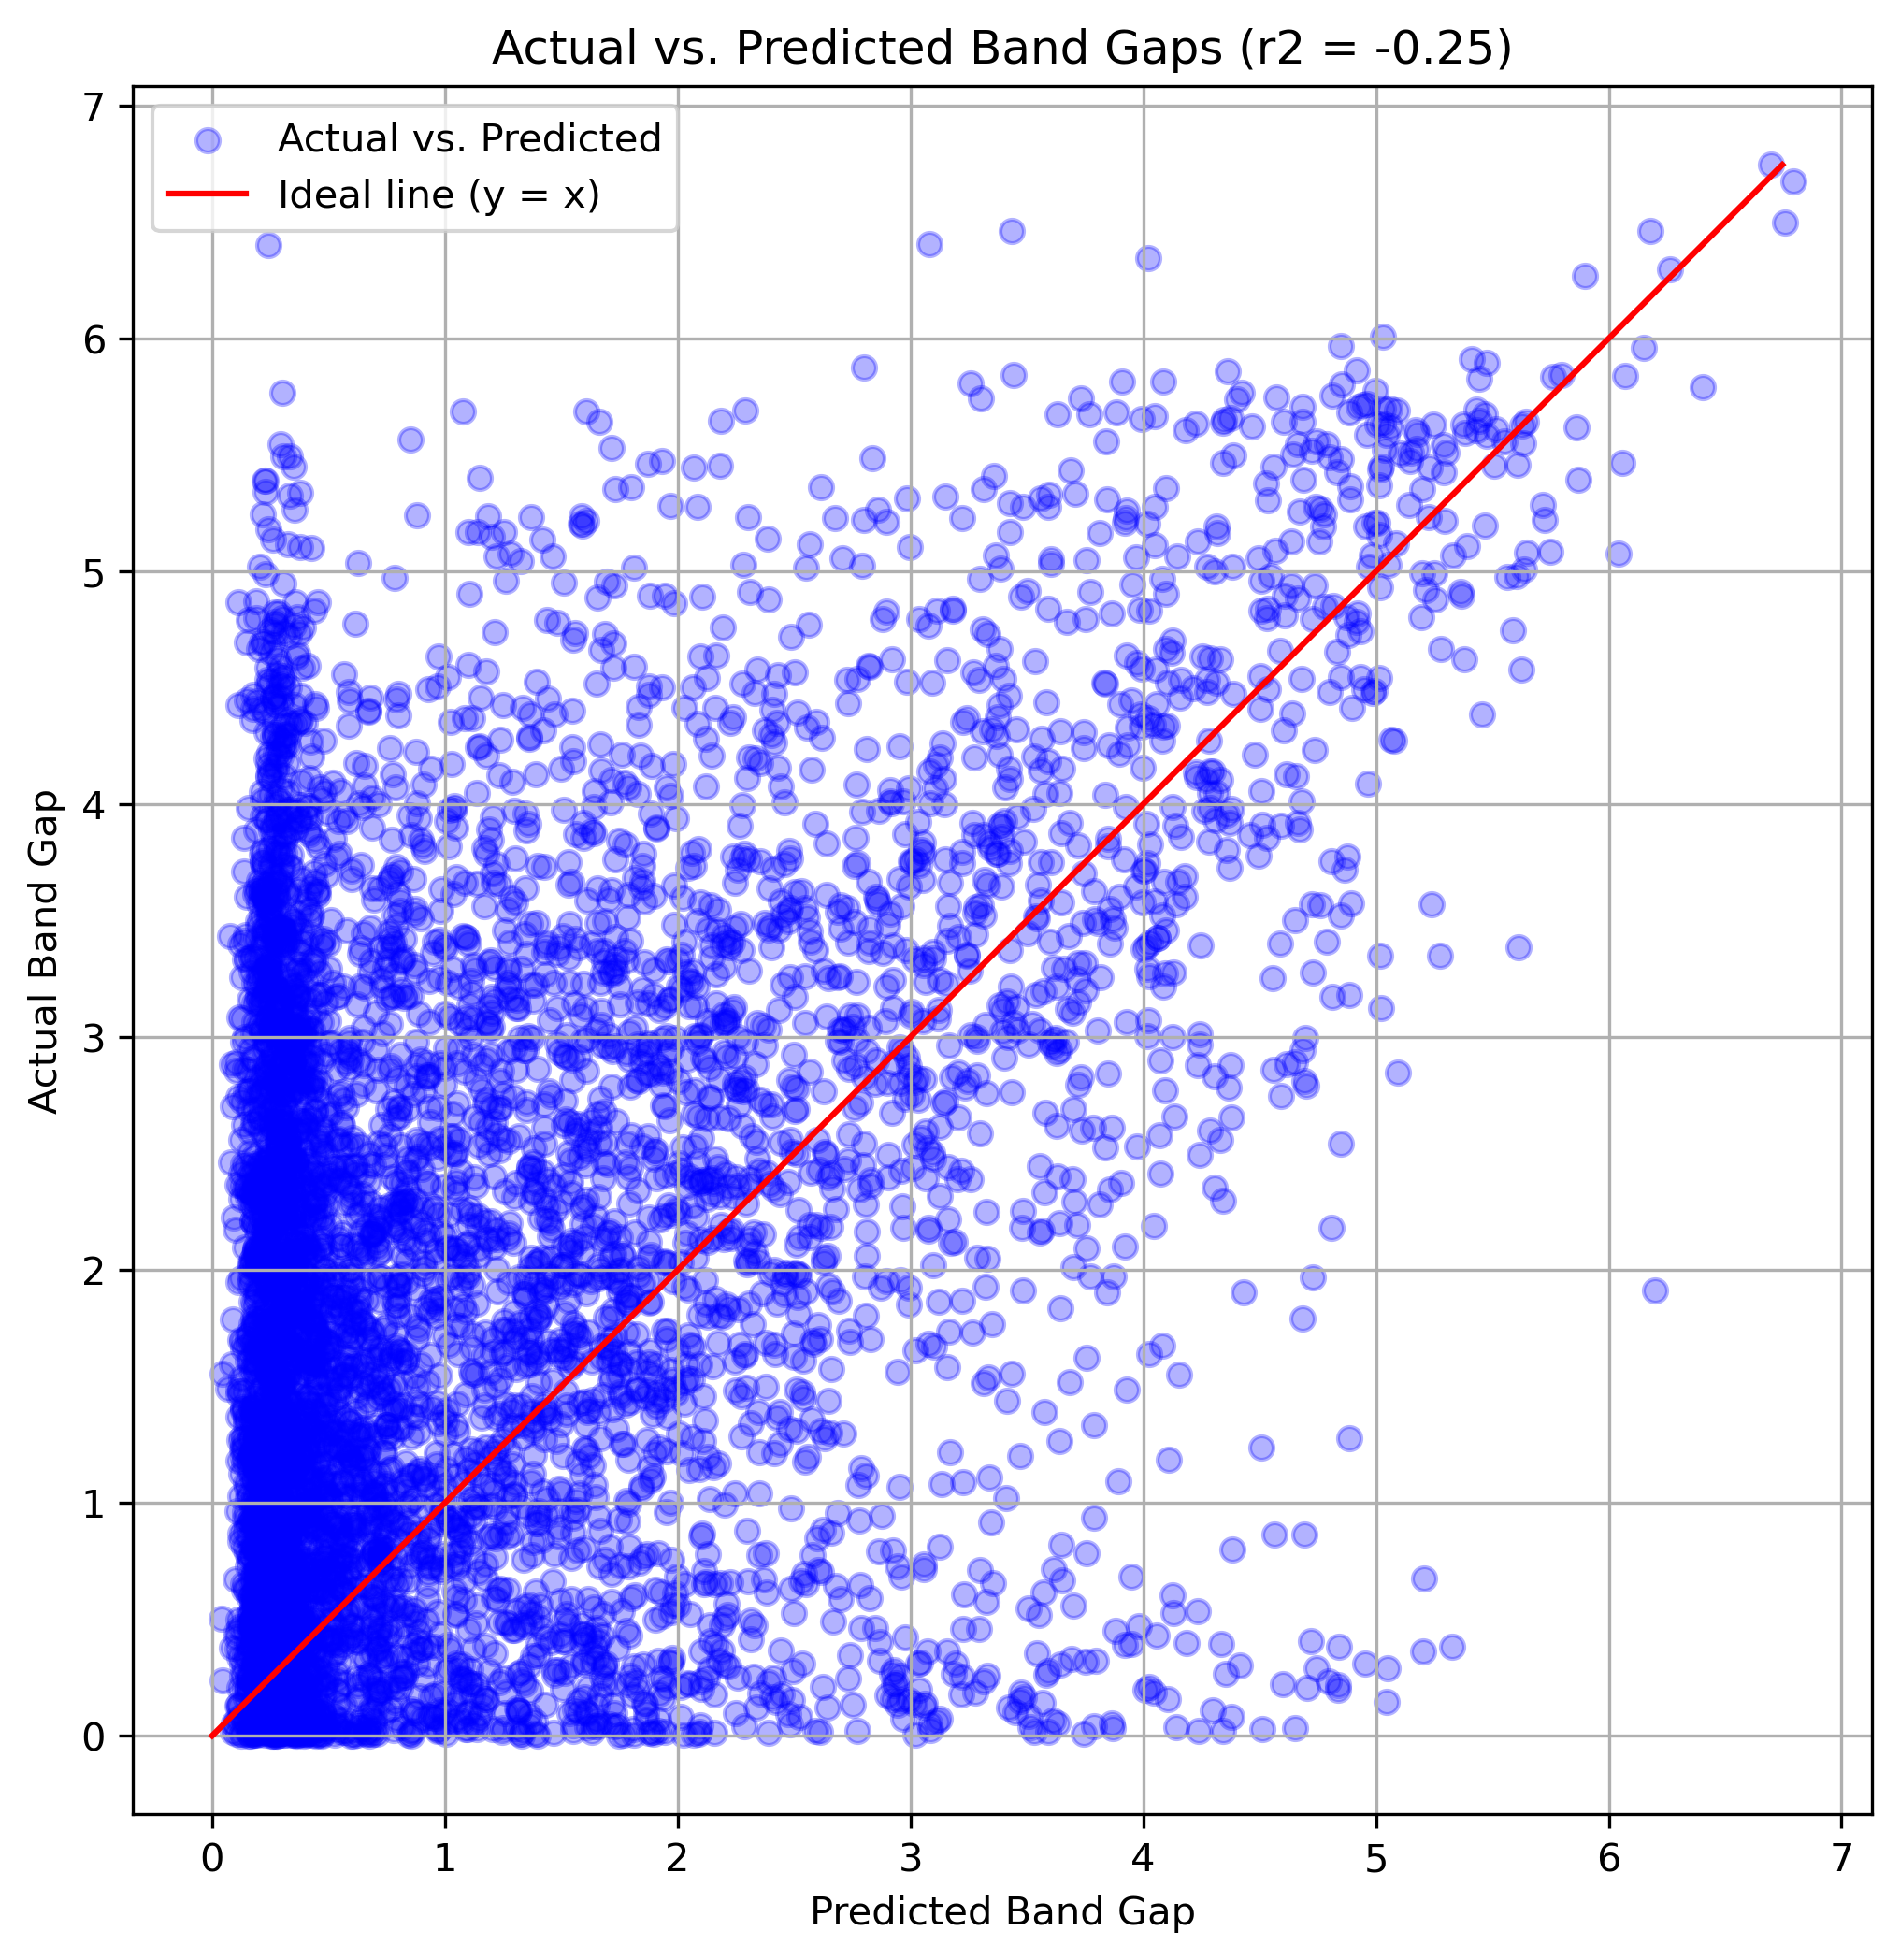

<Figure size 640x480 with 0 Axes>

In [27]:


# 실제 및 예측된 밴드 갭 데이터를 저장할 리스트 초기화
actual_band_gaps = []
predicted_band_gaps = []

# CSV 파일에서 데이터를 읽어옵니다.
with open(csv_filename, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # 각 행에서 실제 밴드 갭과 예측된 밴드 갭을 추출합니다.
        actual_band_gaps.append(float(row['Real Band Gap']))
        predicted_band_gaps.append(float(row['Predicted Band Gap']))

print(len(actual_band_gaps))
print(len(predicted_band_gaps))
print(actual_band_gaps)
print(predicted_band_gaps)
 
# r2 값 계산
r2 = r2_score(actual_band_gaps,predicted_band_gaps)

# 그래프 그리기
plt.figure(figsize=(8, 8), dpi=300)

plt.scatter(predicted_band_gaps,actual_band_gaps, color='blue', alpha=0.3, label='Actual vs. Predicted')
plt.plot([min(actual_band_gaps), max(actual_band_gaps)], [min(actual_band_gaps), max(actual_band_gaps)], color='red', label='Ideal line (y = x)')
plt.xlabel('Predicted Band Gap')
plt.ylabel('Actual Band Gap')
plt.title('Actual vs. Predicted Band Gaps (r2 = {:.2f})'.format(r2))
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('/home/ljm/matgl_bandgap/Last_version/ouput_r2.png')

Mean Absolute Error (MAE): 1.2541139004149378 ev


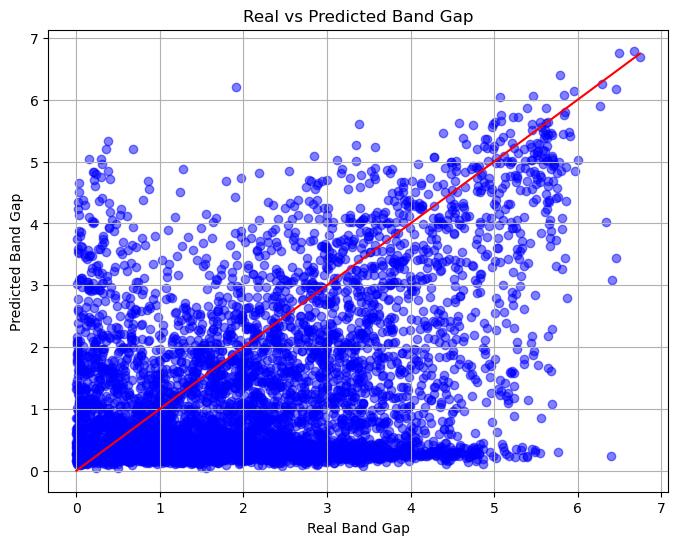

In [32]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# CSV 파일 읽기
data = pd.read_csv('/home/ljm/matgl_bandgap/Last_version/band_gap_results.csv')

# 실제값과 예측값 가져오기
real_values = data['Real Band Gap']
predicted_values = data['Predicted Band Gap']

# MAE 계산
mae = mean_absolute_error(real_values, predicted_values)
print("Mean Absolute Error (MAE):", mae,"ev")

# 차트 그리기
plt.figure(figsize=(8, 6))
plt.scatter(real_values, predicted_values, color='blue', alpha=0.5)
plt.plot([min(real_values), max(real_values)], [min(real_values), max(real_values)], color='red')
plt.title('Real vs Predicted Band Gap')
plt.xlabel('Real Band Gap')
plt.ylabel('Predicted Band Gap')
plt.grid(True)
plt.show()